In [1]:
import numpy as np

In [2]:
import snsims
import healpy as hp

In [3]:
from astropy.cosmology import Planck15 as cosmo

In [4]:
import sncosmo

In [5]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=9.6,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.10001, 1.1, 0.1))

In [6]:
zdist.zSamples

array([ 0.18764892,  0.18947067,  0.10851442, ...,  0.91886182,
        0.98088875,  0.98514495])

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
sp = snsims.SimpleSALTDist(numSN=len(zdist.zSamples), zSamples=zdist.zSamples, rng=np.random.RandomState(8))

In [9]:
sp.paramSamples.head()

,M,Mabs,c,mB,snid,t0,x0,x1,z
0,-0.058856,-19.283474,0.002424,20.587142,0,3188.017320,0.000092,0.465862,0.187649
1,0.104389,-19.260779,-0.095250,20.633138,1,3535.173419,0.000088,1.769954,0.189471
2,-0.446661,-19.701191,0.154431,18.873455,2,3172.560072,0.000447,-0.347746,0.108514
3,-0.408183,-19.795811,0.160936,18.678227,3,1937.623274,0.000536,-0.883252,0.103915
4,0.342755,-18.888345,-0.149383,19.861668,4,849.458397,0.000179,1.148238,0.116993


In [10]:
mB = np.zeros(len(sp.paramSamples))

In [11]:
model = sncosmo.Model('salt2')
for ind, row in sp.paramSamples.iterrows():
    model.set(**dict(z=row['z'], x1=row['x1'], c=row['c'], x0=row['x0']))
    mB[ind] = model.source_peakabsmag('bessellB', 'ab')

In [12]:
sp.paramSamples['mBessellB'] = mB

In [13]:
gmm_dist = snsims.GMM_SALT2Params(numSN=len(zdist.zSamples), 
                                  zSamples=zdist.zSamples, 
                                  rng=np.random.RandomState(8))

In [14]:
gp = gmm_dist.paramSamples

In [15]:
gmm_dist.zSamples

array([ 0.18764892,  0.18947067,  0.10851442, ...,  0.91886182,
        0.98088875,  0.98514495])

In [16]:
sp.paramSamples.mBessellB.describe()

count    11487.000000
mean       -19.272790
std          0.364226
min        -20.739129
25%        -19.515609
50%        -19.272755
75%        -19.031320
max        -17.758622
Name: mBessellB, dtype: float64

In [17]:
gp.mB.describe()

count    11487.000000
mean       -19.089532
std          0.308843
min        -20.021338
25%        -19.310423
50%        -19.102347
75%        -18.888377
max        -17.693861
Name: mB, dtype: float64

/usr/local/miniconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


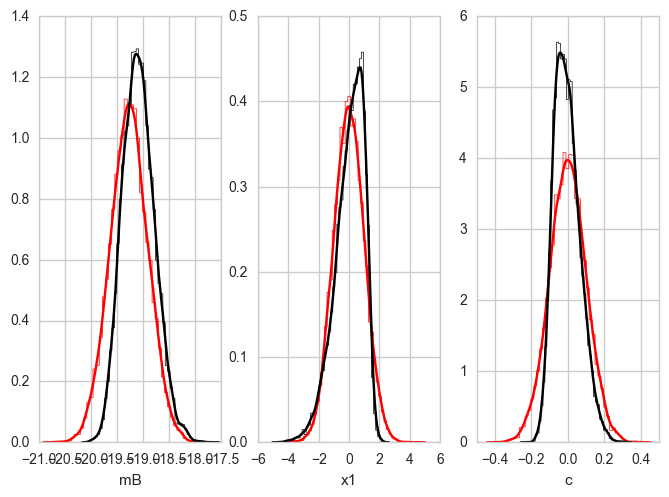

In [18]:
fig, ax = plt.subplots(1, 3)
sns.distplot(sp.paramSamples.mBessellB, rug=False, hist_kws=dict(histtype='step', alpha=1, lw=0.5), color='r', ax=ax[0])
sns.distplot(gp.mB, rug=False, hist_kws=dict(histtype='step', alpha=1, lw=0.5), color='k', ax=ax[0], label='')

sns.distplot(sp.paramSamples.x1, rug=False, hist_kws=dict(histtype='step', alpha=1, lw=0.5), color='r', ax=ax[1])
sns.distplot(gp.x1, rug=False, hist_kws=dict(histtype='step', alpha=1, lw=0.5), color='k', ax=ax[1])

sns.distplot(sp.paramSamples.c, rug=False, hist_kws=dict(histtype='step', alpha=1, lw=0.5), color='r')
sns.distplot(gp.c, rug=False, hist_kws=dict(histtype='step', alpha=1, lw=0.5), color='k')
plt.legend()


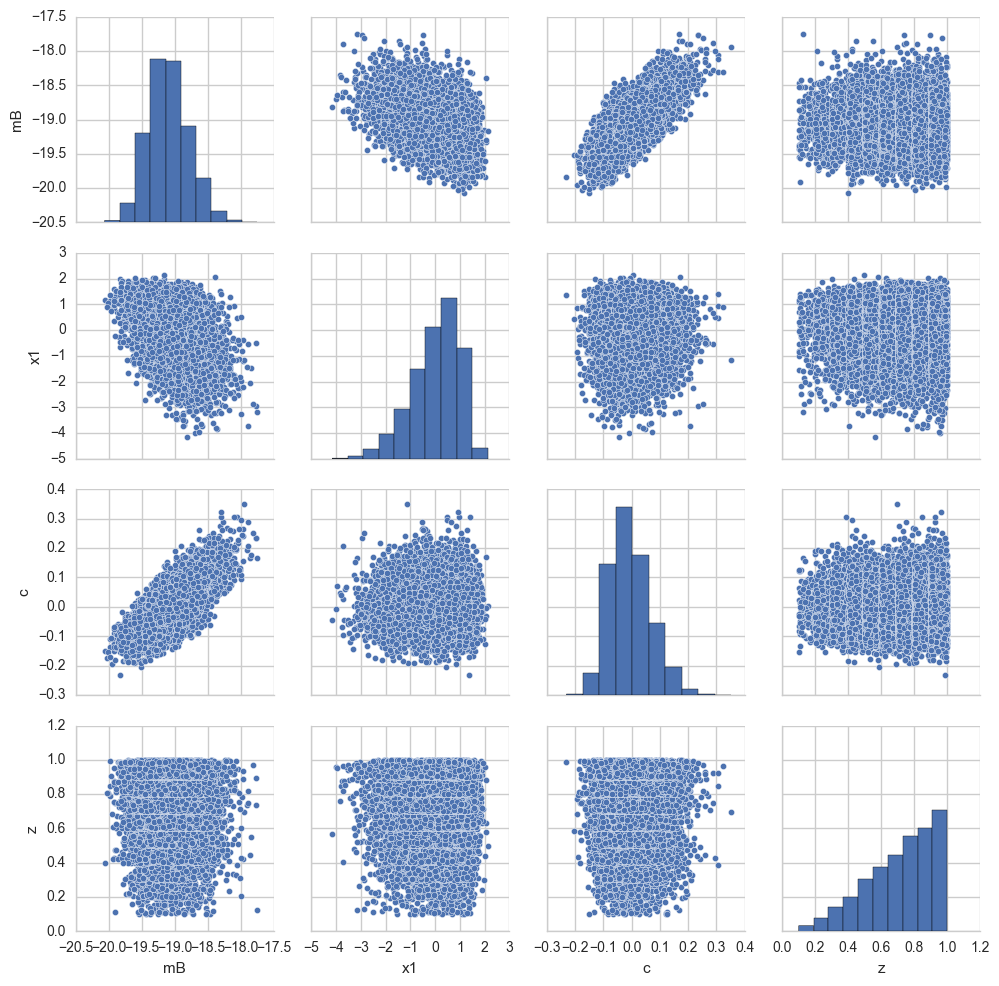

In [20]:
sns.pairplot(gp[['mB', 'x1', 'c', 'z']], kind='scatter')

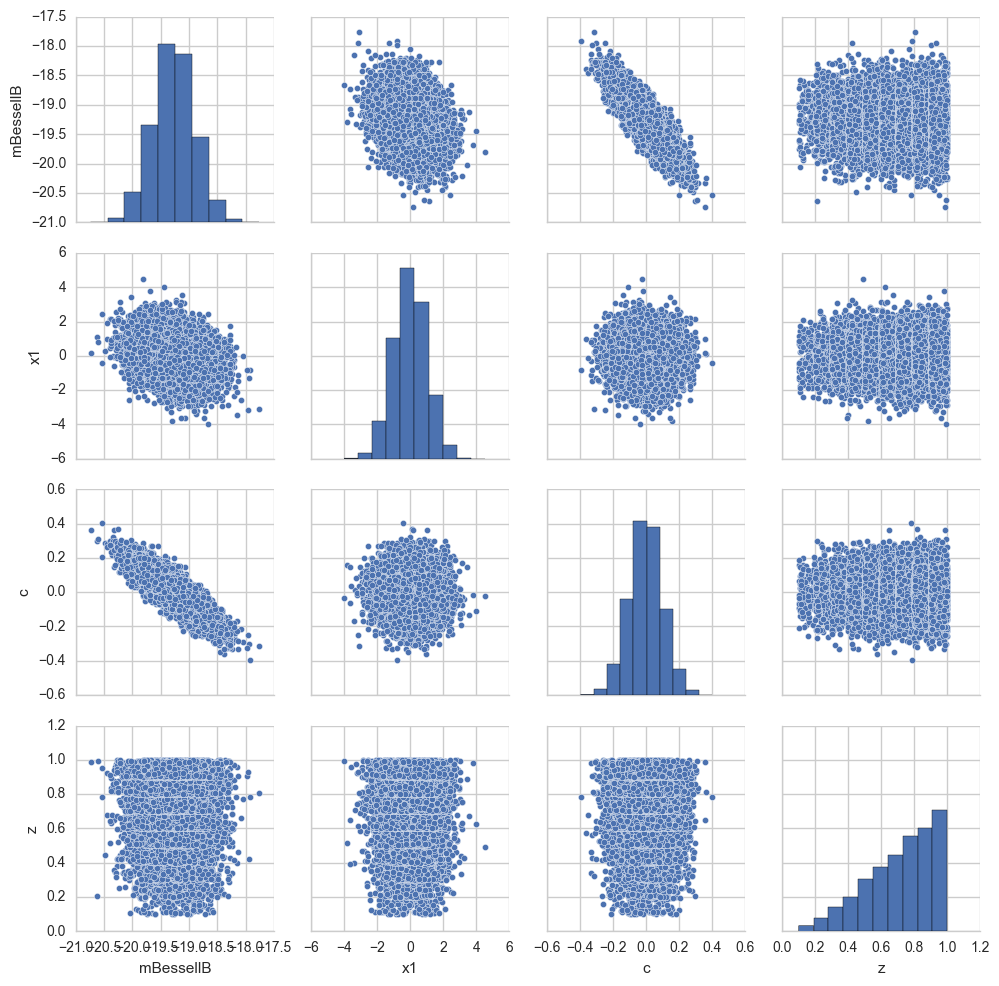

In [52]:
sns.pairplot(sp.paramSamples[['mBessellB', 'x1', 'c', 'z']], kind='scatter')

# Scratch

In [23]:
import sncosmo
model = sncosmo.Model(source='salt2')

In [24]:
model.set(z=0.5, x1=0., c=0.)

In [27]:
model.set_source_peakabsmag(-19.0, 'bessellB', 'ab')

In [28]:
print model

source:
  class      : SALT2Source
  name       : 'salt2'
  version    : 2.4
  phases     : [-20, .., 50] days
  wavelengths: [2000, .., 9200] Angstroms
parameters:
  z  = 0.5
  t0 = 0.0
  x0 = 7.6322716034570905e-06
  x1 = 0.0
  c  = 0.0


In [29]:
model.source.peakmag('bessellB', 'ab')

23.292512497858301

In [30]:
from astropy.cosmology import FlatLambdaCDM

In [31]:
cosmo = FlatLambdaCDM(H0=69.3, Om0=0.286)

In [35]:
cosmo.distmod(z=0.5).value -19.0

23.29352082682366

## Parts of the calculation

In [13]:
zbin_edges = np.arange(0.1, 1.01, 0.1)
diff_volume = cosmo.comoving_volume(zbin_edges[1:]) - cosmo.comoving_volume(zbin_edges[:-1])
print diff_volume

[  2.17006770e+09   5.32151113e+09   9.30243830e+09   1.37157266e+10
   1.82594260e+10   2.27178757e+10   2.69472784e+10   3.08599635e+10
   3.44098469e+10] Mpc3


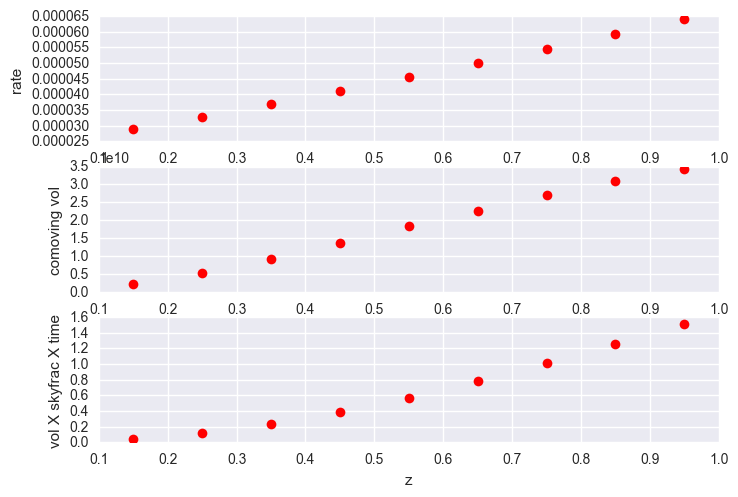

In [14]:
fig_subs, axs = plt.subplots(3)
axs[0].plot(zvals, zdist.snRate(zvals), 'or')
axs[1].plot(zvals, diff_volume , 'or')
axs[2].plot(zvals, diff_volume * zdist.snRate(zvals)*10.0/40000. / 365.0, 'or')
axs[2].set_xlabel('z')
axs[0].set_ylabel('rate')
axs[1].set_ylabel('comoving vol')
axs[2].set_ylabel('vol X skyfrac X time')

## Total Number of SN

In [29]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=18000.,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 0.901, 0.1))

In [16]:
zdist.zSampleSize().sum() /1.0e6

13.100576240318187

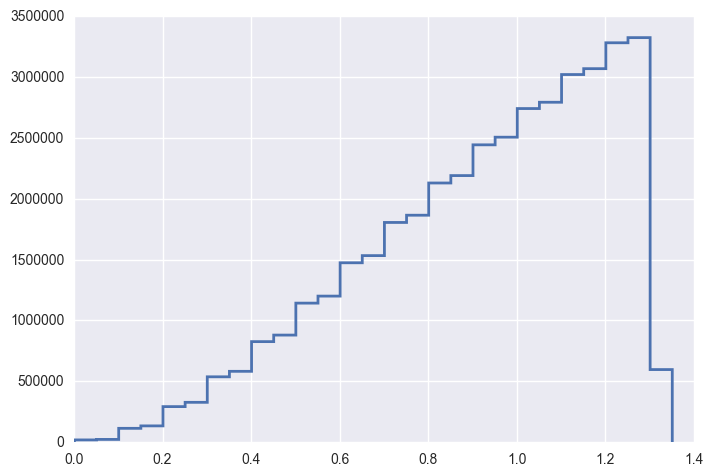

In [22]:
fig, ax  = plt.subplots()
_ = ax.hist(zdist.zSamples, bins=np.arange(0.001, 1.4, 0.05), histtype='step', lw=2., alpha=1.)

In [ ]:
arcmin = 1.0 / 60. 

In [24]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=10.,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 0.901, 0.05))

In [28]:
np.array(map(np.float, zdist.numSN())) /5.

array([   0.4,    3.8,    8.4,   18.4,   30.4,   44.4,   61.6,   74.6,
         89.8,  102. ,  127.2,  150.6,  146.2,  187.8,  196.8,  217. ,
        230.8])

In [20]:
np.pi * (1.0 / 12.)**2

0.02181661564992912

In [21]:
10.0 / 200.

0.05